In [6]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker and Random
fake = Faker()
random.seed(42)

# List of attractions
attractions = [
    "Kigali Memorial Site", "Parliament", "Fazendha", "Nyandungu park", "Cricket - Gahanga", 
    "Kigali Convetion center", "BK Arena", "Amahoro Stadium", "Volcanoes NP (Gorilla trekking)", 
    "Hiking Mt Bisoke", "Karisoke Research Center - Dian Fossey Camp", 
    "Ellen DeGeneres Campus of the Dian Fossey Gorilla Fund", "Underground caves", "Twin Lakes", 
    "Lake Kivu", "Amashyuza hot springs", "Ibere rya bigogwe", "Nyungwe NP", "Gishwati", "Kibeho", 
    "King’s Palace", "Ethnographic Museum", "Kitabi eco center", "Cathedral", "Akagera NP", 
    "Rusumo waterfalls", "Royal balloon", "Imigongo art centre"
]

# Function to generate a random interaction
def generate_interaction(user_id, attraction):
    return {
        "userId": user_id,
        "attractionId": attraction,
        "interactionType": "view",
        "timestamp": fake.date_time_this_year().isoformat()
    }

# Generate data for 100 users with 10 interactions each
num_users = 100
num_interactions = 10
data = []

for _ in range(num_users):
    user_id = fake.uuid4()
    for _ in range(num_interactions):
        attraction = random.choice(attractions)
        data.append(generate_interaction(user_id, attraction))

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('/tmp/synthetic_user_interactions.csv', index=False)


In [5]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import boto3

# Load the dataset from S3
s3 = boto3.client('s3')
bucket_name = 'interactionsdataset'
file_key = 'synthetic_user_interactions.csv'

s3.download_file(bucket_name, file_key, '/tmp/synthetic_user_interactions.csv')
df = pd.read_csv('/tmp/synthetic_user_interactions.csv')

# Display the first few rows
df.head()

# Data preprocessing
df['timestamp'] = pd.to_datetime(df['timestamp'])
label_encoder_user = LabelEncoder()
label_encoder_attraction = LabelEncoder()
df['userId_encoded'] = label_encoder_user.fit_transform(df['userId'])
df['attractionId_encoded'] = label_encoder_attraction.fit_transform(df['attractionId'])

# One-hot encode interactionType
one_hot_encoder = OneHotEncoder(sparse_output=False)
interaction_type_encoded = one_hot_encoder.fit_transform(df[['interactionType']])
interaction_type_encoded_df = pd.DataFrame(interaction_type_encoded, columns=one_hot_encoder.get_feature_names_out(['interactionType']))
df = pd.concat([df, interaction_type_encoded_df], axis=1)

# # Display the first few rows to confirm the encoding
# df.head()

Matplotlib is building the font cache; this may take a moment.


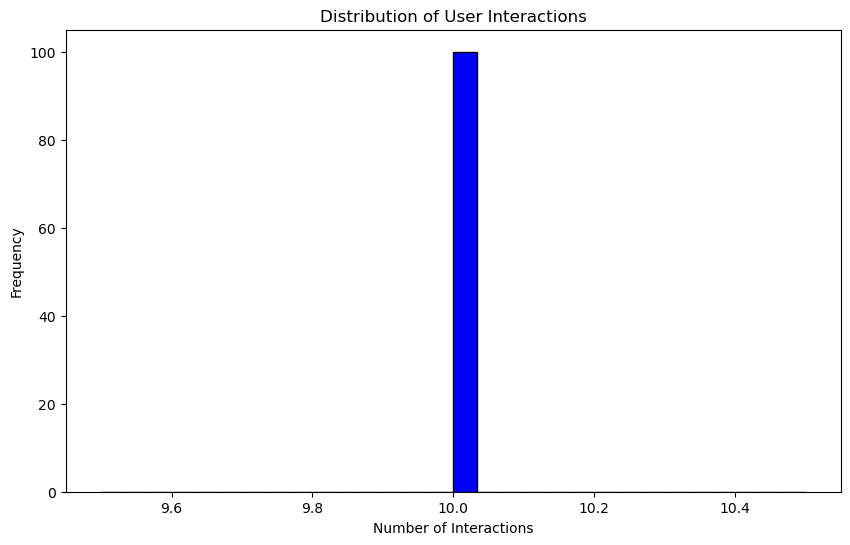

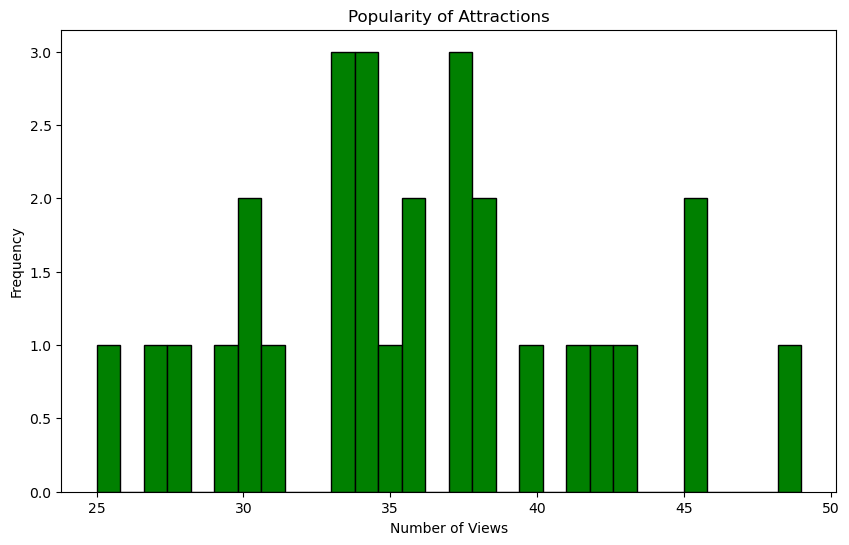

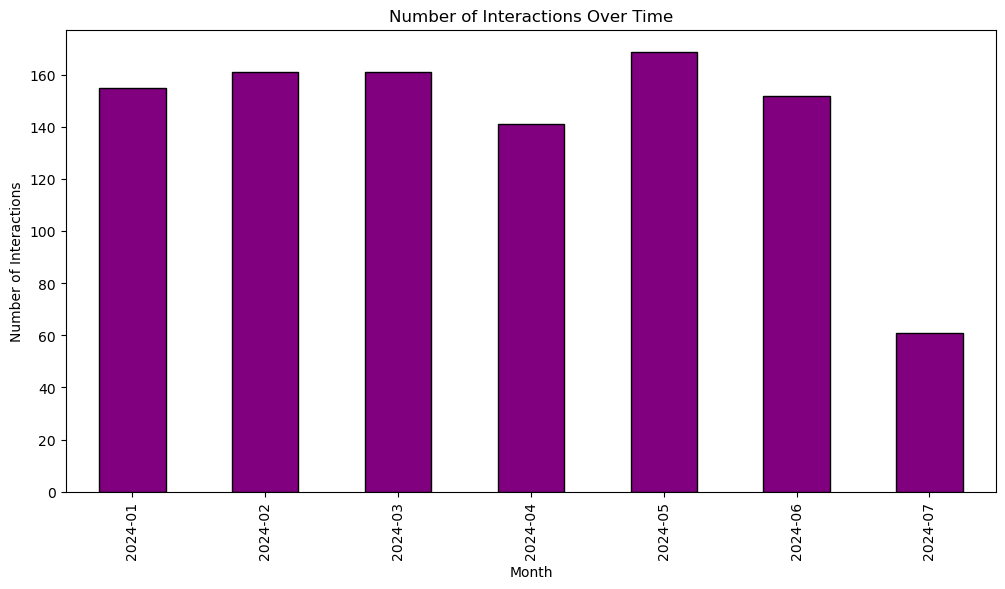

In [10]:
import matplotlib.pyplot as plt

# Distribution of user interactions
user_interactions = df['userId_encoded'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of User Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

# Popularity of attractions
attraction_popularity = df['attractionId_encoded'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(attraction_popularity, bins=30, color='green', edgecolor='black')
plt.title('Popularity of Attractions')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()

# Temporal Analysis
df['timestamp'].groupby(df['timestamp'].dt.to_period('M')).count().plot(kind='bar', figsize=(12, 6), color='purple', edgecolor='black')
plt.title('Number of Interactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.show()


In [ ]:
import boto3

# Create a SageMaker client
sagemaker_client = boto3.client('sagemaker')

# List endpoints
response = sagemaker_client.list_endpoints()

# Print the endpoint names
for endpoint in response['Endpoints']:
    print(endpoint['EndpointName'])


In [ ]:
import boto3

# Create a SageMaker client
sagemaker_client = boto3.client('sagemaker')

# Specify the endpoint name you want to delete
endpoint_name = 'factorization-machines-2024-07-25-19-23-18-370'

# Delete the endpoint
sagemaker_client.delete_endpoint(EndpointName=endpoint_name)

print(f"Endpoint '{endpoint_name}' has been deleted.")


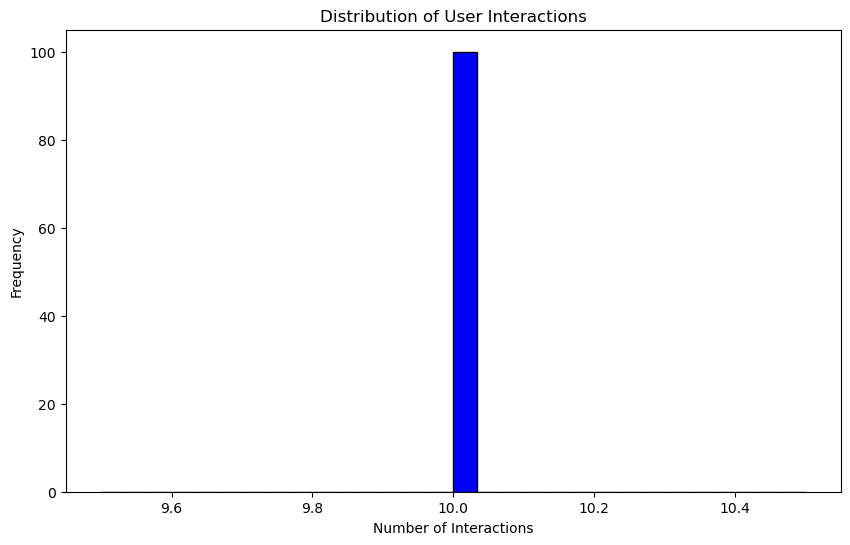

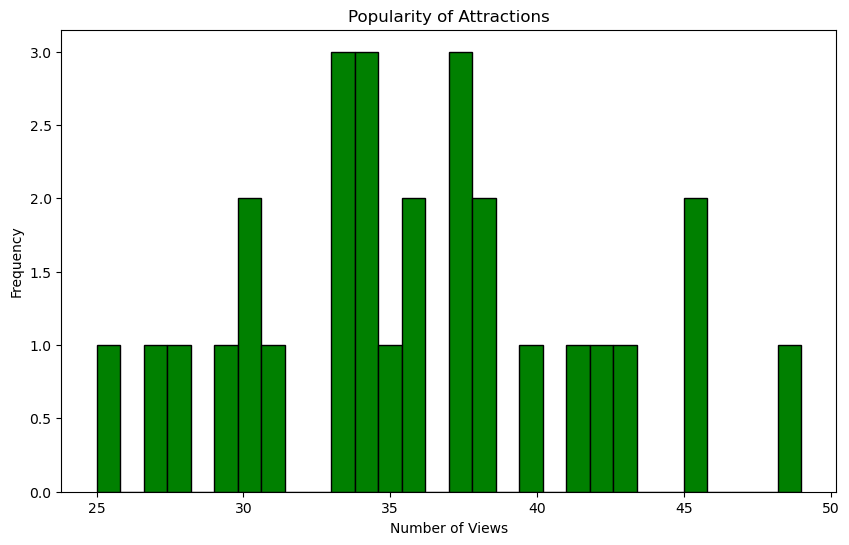

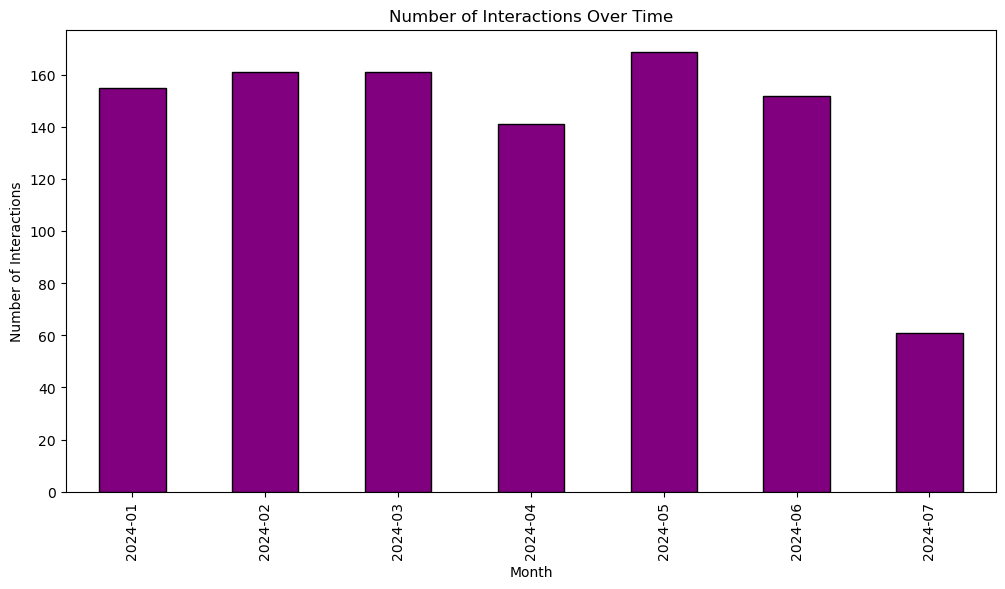

In [11]:
import pandas as pd
import boto3
import matplotlib.pyplot as plt
from io import StringIO

# Initialize boto3 client
s3 = boto3.client('s3')

# S3 bucket and file details
bucket_name = 'interactionsdataset'
file_key = 'synthetic_user_interactions.csv'

# Download the file from S3
s3_object = s3.get_object(Bucket=bucket_name, Key=file_key)
s3_data = s3_object['Body'].read().decode('utf-8')

# Load the data into a pandas DataFrame
df = pd.read_csv(StringIO(s3_data))

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Distribution of user interactions
user_interactions = df['userId'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of User Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

# Popularity of attractions
attraction_popularity = df['attractionId'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(attraction_popularity, bins=30, color='green', edgecolor='black')
plt.title('Popularity of Attractions')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()

# Temporal Analysis
df['timestamp'].groupby(df['timestamp'].dt.to_period('M')).count().plot(kind='bar', figsize=(12, 6), color='purple', edgecolor='black')
plt.title('Number of Interactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.show()


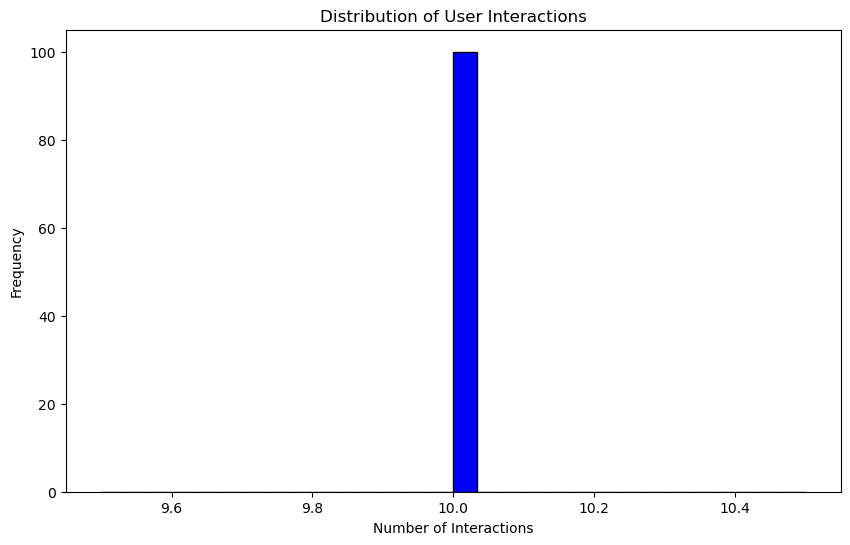

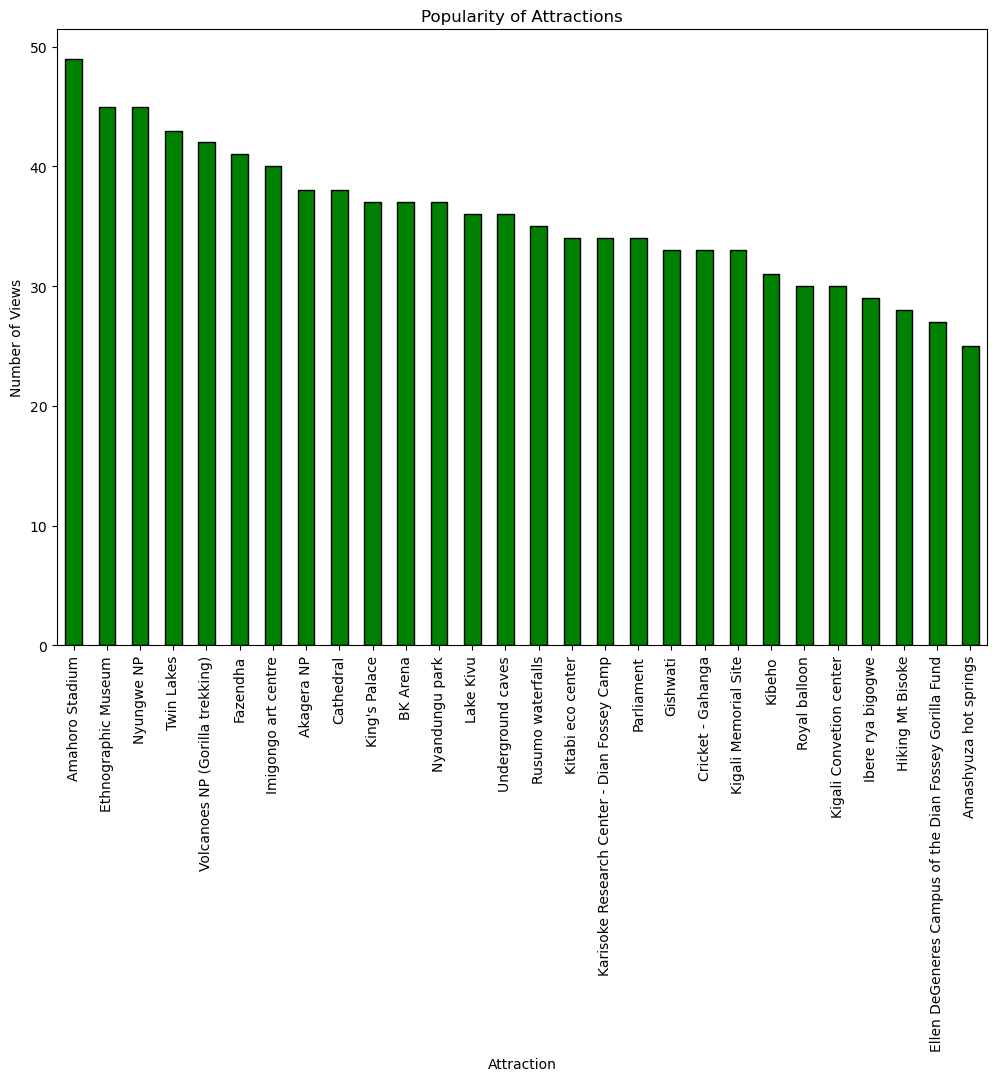

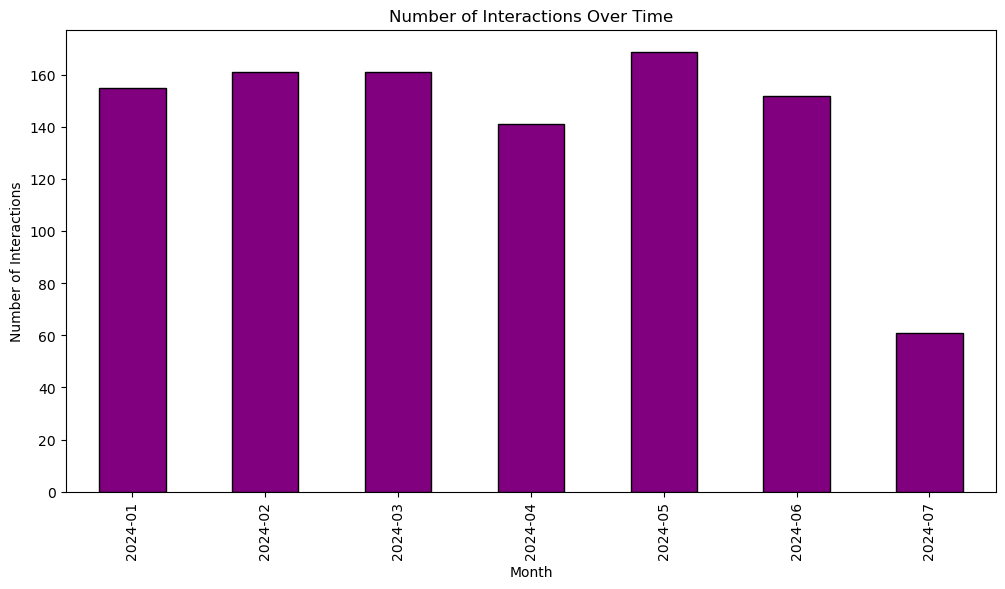

In [12]:
import pandas as pd
import boto3
import matplotlib.pyplot as plt
from io import StringIO

# Initialize boto3 client
s3 = boto3.client('s3')

# S3 bucket and file details
bucket_name = 'interactionsdataset'
file_key = 'synthetic_user_interactions.csv'

# Download the file from S3
s3_object = s3.get_object(Bucket=bucket_name, Key=file_key)
s3_data = s3_object['Body'].read().decode('utf-8')

# Load the data into a pandas DataFrame
df = pd.read_csv(StringIO(s3_data))

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Distribution of user interactions
user_interactions = df['userId'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of User Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

# Popularity of attractions
attraction_popularity = df['attractionId'].value_counts()

plt.figure(figsize=(12, 8))
attraction_popularity.plot(kind='bar', color='green', edgecolor='black')
plt.title('Popularity of Attractions')
plt.xlabel('Attraction')
plt.ylabel('Number of Views')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

# Temporal Analysis
df['timestamp'].groupby(df['timestamp'].dt.to_period('M')).count().plot(kind='bar', figsize=(12, 6), color='purple', edgecolor='black')
plt.title('Number of Interactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.show()


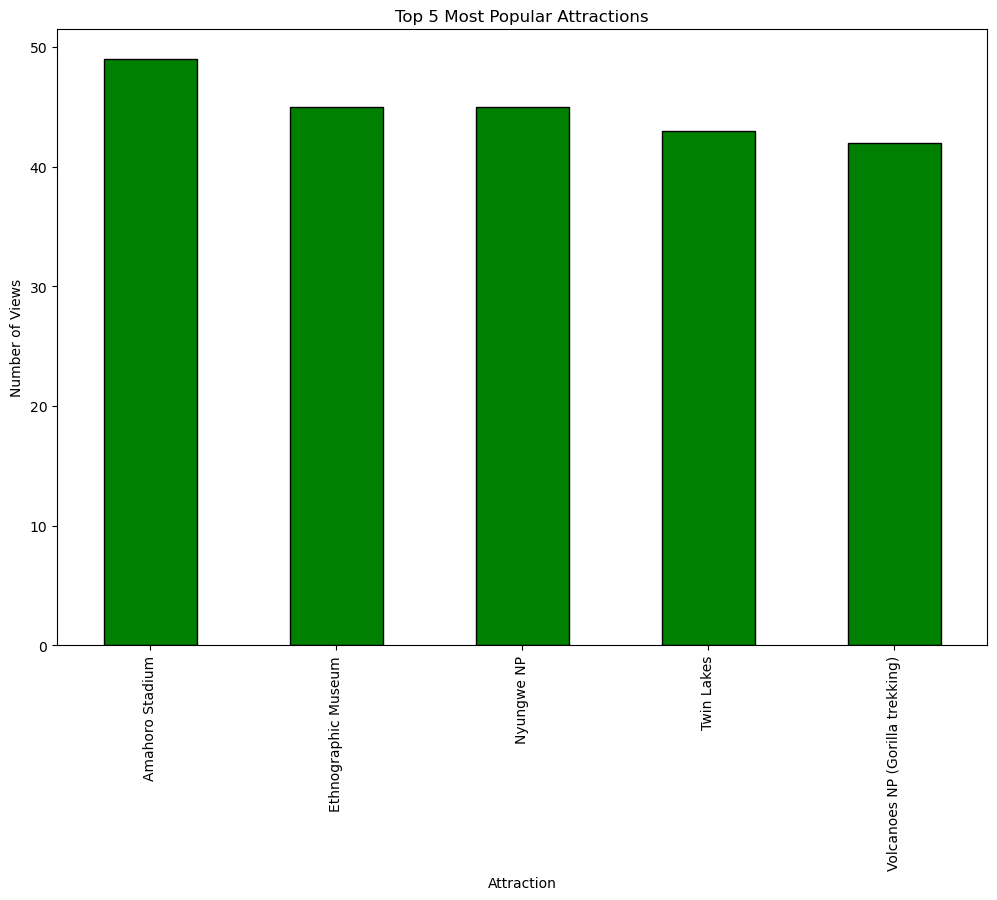

In [17]:
# Calculate the popularity of each attraction
attraction_popularity = df['attractionId'].value_counts()

# Select the top 5 most popular attractions
top_5_attractions = attraction_popularity.head(5)

# Plot the data
plt.figure(figsize=(12, 8))
top_5_attractions.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 5 Most Popular Attractions')
plt.xlabel('Attraction')
plt.ylabel('Number of Views')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()
